### Predict sales using different types of advertising data
#### Author: Peiyun Zhou

Import the libraries for the analysis

In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read in the adertising dataset

In [39]:
advertising=pd.read_csv("Advertising.csv")

Use head() to check the dataset.  
There are three different types of advertisement: TV Ads, Radio Ads, and Newspaper Ads. 

In [40]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [41]:
advertising.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

First, I use TV ads to predict sales.  
Based on the results below, I found that TV significantly affected the sales. The relationsihp is positive (P < 0.05).  
R square indicates that TV ads explained 61% of variation of the sales. 

Intercept, Slope : Intercept    7.032594
TV           0.047537
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 3314.6181668686486
SST: 5417.14875
SSR: 2102.5305831313517
RMSE: 57.57272068322504
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.47e-42
Time:                        14:07:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

Text(0.5,1,'Residual Histogram')

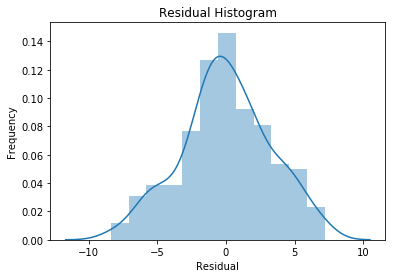

In [42]:
ols_model = sm.ols(formula = 'sales ~ TV', data=advertising)
results = ols_model.fit()
# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

x_input = advertising['TV'].values.reshape(200, 1)  
y_output = advertising['sales'].values.reshape(200, 1)
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [43]:
x = advertising['TV'].values.reshape(200, 1) 
y = advertising['sales'].values.reshape(200, 1) 

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [44]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

print('Intercept: {0:.5f}'.format(regression_model.intercept_[0]))
print('Slope : {0:.5f}'.format(regression_model.coef_[0][0]))

Intercept: 14.02250
Slope : 4.07101


In the following plot, I showed the scatterplot of TV Ads and the sales with the fitted linear line. 

Text(0.5,1,'TV vs Sales')

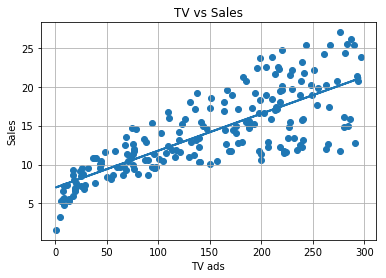

In [45]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)
# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV ads')
plt.ylabel('Sales')
plt.title('TV vs Sales')

Secondly,I use Radio ads to predict sales. Based on the results below,  
I found that Radio significantly affected the sales. The relationsihp is positive. 

Intercept, Slope : Intercept    9.311638
radio        0.202496
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 1798.6692009749122
SST: 5417.14875
SSR: 3618.479549025088
RMSE: 42.41072035435041
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           4.35e-19
Time:                        14:07:06   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

Text(0.5,1,'Residual Histogram')

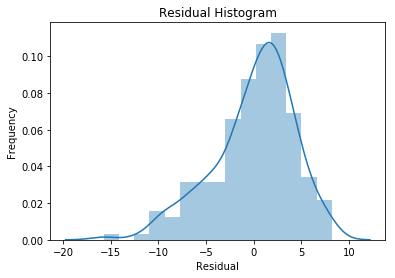

In [46]:
radio_model = sm.ols(formula = 'sales ~ radio', data=advertising)
results = radio_model.fit()
# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
x_input = advertising['radio'].values.reshape(200, 1)  
y_output = advertising['sales'].values.reshape(200, 1)
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [47]:
x = advertising['radio'].values.reshape(200, 1) 
y = advertising['sales'].values.reshape(200, 1) 

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [48]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

print('Intercept: {0:.5f}'.format(regression_model.intercept_[0]))
print('Slope : {0:.5f}'.format(regression_model.coef_[0][0]))

Intercept: 14.02250
Slope : 2.99889


Text(0.5,1,'radio vs sales')

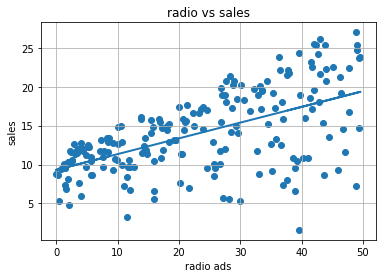

In [49]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)
# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('radio ads')
plt.ylabel('sales')
plt.title('radio vs sales')

Thridly ,I use newspaper ads to predict sales. Based on the results below,  
I found that newspaper ads significantly predicted the sales. But based on the visualization of the data,  
the correlation is not as strong as the previous two variables. 

Intercept, Slope : Intercept    12.351407
newspaper     0.054693
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 282.34420588806097
SST: 5417.14875
SSR: 5134.804544111939
RMSE: 16.803101079504966
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 17 Apr 2019   Prob (F-statistic):            0.00115
Time:                        14:07:06   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                

Text(0.5,1,'Residual Histogram')

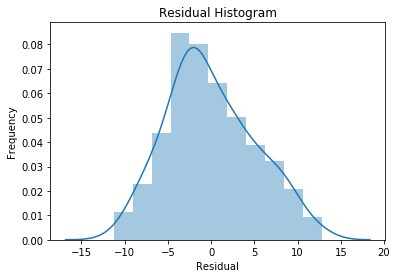

In [50]:
# Now I will use newspaper ads to predict sales
newspaper_model = sm.ols(formula = 'sales ~ newspaper', data=advertising)
results = newspaper_model.fit()
# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
x_input = advertising['newspaper'].values.reshape(200, 1)  
y_output = advertising['sales'].values.reshape(200, 1)
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [51]:
x = advertising['newspaper'].values.reshape(200, 1) 
y = advertising['sales'].values.reshape(200, 1) 

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(regression_model.intercept_[0]))
print('Slope : {0:.5f}'.format(regression_model.coef_[0][0]))

Intercept: 14.02250
Slope : 1.18816


Text(0.5,1,'Newspaper Ads  vs Sales')

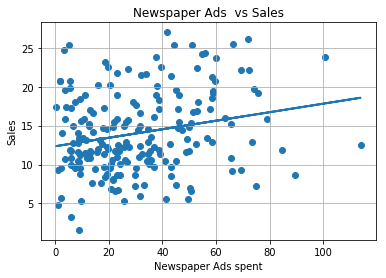

In [52]:
from sklearn import linear_model

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)
# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Newspaper Ads spent')
plt.ylabel('Sales')
plt.title('Newspaper Ads  vs Sales')

Next, I will include all three predictors in the model.  
I foumnd that ad money spend on radio and TV are significant predictors of the sales.  
The relationship is positive. The more you spend on radio ads and TV ads, the better the sales are.  
The newspaper ads did not play a significant role. 
In total, Ads explained 89.6% of the varation in sales. 

Intercept, Slope : Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 4860.323487097813
SST: 5417.14875
SSR: 556.8252629021872
RMSE: 40.250563089633964
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        14:07:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                 

Text(0.5,1,'Residual Histogram')

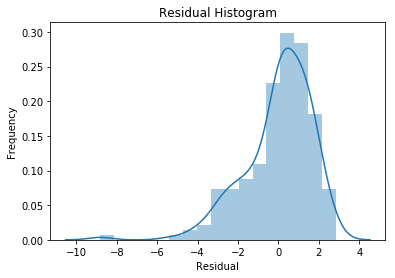

In [53]:
all_model = sm.ols(formula = 'sales ~ TV+radio+newspaper', data=advertising)
results = all_model.fit()
# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [54]:
x = advertising[['newspaper','TV','radio']].values.reshape(200, 3) 
y = advertising['sales'].values.reshape(200, 1) 

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
